# Comparison of Machine Learning Models for Intrusion Detection

    Jalees Ur Rahman
    MS data science

<b>Introduction:</b>
Data privacy and confidentiality is the big concern for companies now a days. This project has tried to overcome this intrusion detection issue. Most recent researches have used adaptive ML ensemble technique for intrusion detection (Gao et al, 2019). The have targeted supervised ML techniques for intrusion detection in training data attacks. This project has implemented these supervised ML algorithms for detection of threats, but I have used different preprocessing and feature selection data cleansing. The output comparisons and results are fair enough with (Gao et al, 2019).

## Step 1 and 2: Data Loading and Exploration

<b>Dataset Description:</b>
NSL-KDD dataset in advance version of KDD’99 dataset (Tavallaee et al, 2009), which have solved some inherent problems from previous version. This dataset contains TrainKDD+.txt and testKDD.txt files which have all the training and testing data with labels in it, respectively. The folder also contains training_attack_types.txt file which has all possible categories of the attacks along with attack types. There are 39 attack types which is part of 4 different attack categories. Figure 1 depicts attack types and categories, resulted from python code. There are total 43 number of features in the data and total samples/instances in the training data are 125973 while testing data have 22544 samples.

    Code for dataset uploading and describing

In [1]:
import pandas as pd

# Insert dataset path
dataPath = 'Provide the path where unzipped dataset files are stored'

#Upload training and testing and types files from disk
trainData = pd.read_csv(dataPath + '\\KDDTrain+.txt')
testData = pd.read_csv(dataPath + '\\KDDTest+.txt')
attackFile = pd.read_csv(dataPath + '\\training_attack_types.txt', delimiter = ' ')

#Display attack types, categories, length of train and test datasets
attackCats = attackFile['attack_category'].unique()
attackTypes = attackFile['attack_type'].unique()

print('\033[1mTotal attacks categories in the dataset are '+ str(len(attackCats)) +
      ' which are \033[0m\n{}'.format(attackCats))
print('\n\033[1mTotal attacks types in the dataset are '+ str(len(attackTypes)) +
      ' which are \033[0m\n{}'.format(attackTypes))
print('\n\033[1mTraining Data samples are '+ str(len(trainData)))
print('\n\033[1mTesting Data samples are '+ str(len(testData)))


Total attacks categories in the dataset are 39 which are 
['apache2' 'back' 'mailbomb' 'processtable' 'snmpgetattack' 'teardrop'
 'smurf' 'land' 'neptune' 'pod' 'udpstorm' 'ps' 'buffer_overflow' 'perl'
 'rootkit' 'loadmodule' 'xterm' 'sqlattack' 'httptunnel' 'ftp_write'
 'guess_passwd' 'snmpguess' 'imap' 'spy' 'warezclient' 'warezmaster'
 'multihop' 'phf' 'named' 'sendmail' 'xlock' 'xsnoop' 'worm' 'nmap'
 'ipsweep' 'portsweep' 'satan' 'mscan' 'saint']

Total attacks types in the dataset are 4 which are 
['dos' 'u2r' 'r2l' 'probe']

Training Data samples are 125973

Testing Data samples are 22544


In [2]:
print('\n\033[1mDataset Header')
display(trainData.head())


Dataset Header


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


As you can see that there are few columns which have non-numeric data. Data cleaning has taken care of this mixed data.

##  Step 3: Data Cleaning

In [3]:
#Identify and select non-numeric columns
nonNumCols = ['protocol_type', 'service', 'flag', 'occurance']

#Drop non-numeric columns from training and testing data
trainData.drop(nonNumCols, axis=1, inplace=True)
testData.drop(nonNumCols, axis=1, inplace=True)

#Convert all types of attacks into threat label for both training and testing data
trainData.loc[trainData['attack_category'] != 'normal', 'attack_category'] = 'threat'
testData.loc[testData['attack_category'] != 'normal', 'attack_category'] = 'threat'

## Step 4: Data Visualization 

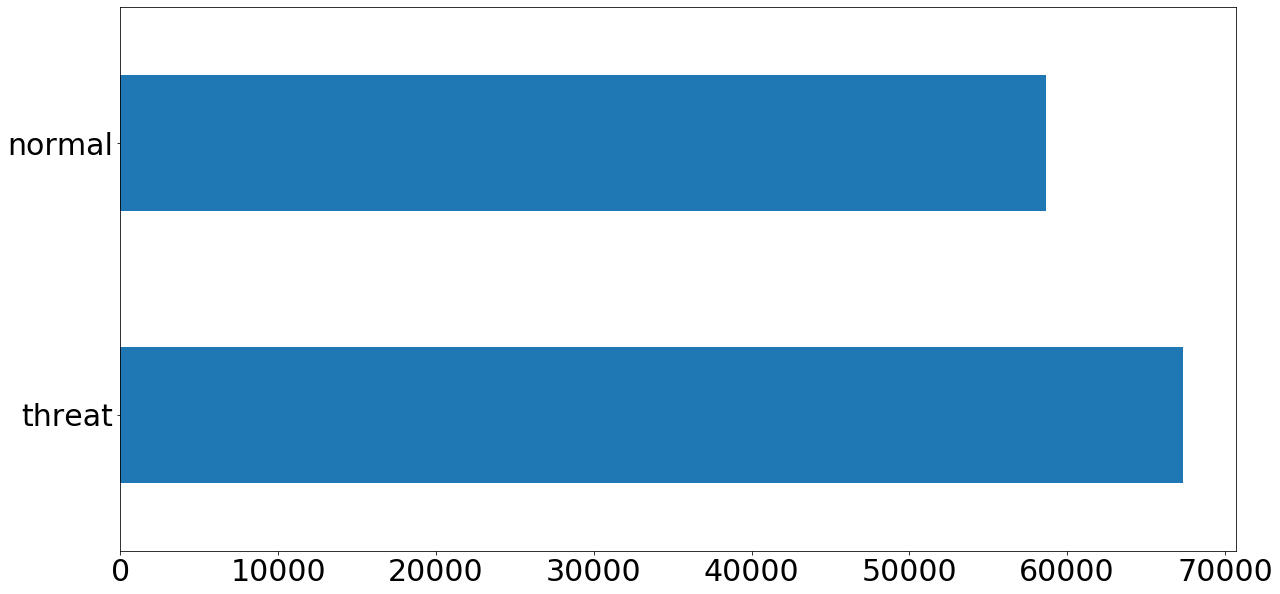

In [4]:
#Count each label samples in tranining and testing set
trainCats = trainData['attack_category'].value_counts()
testCats = testData['attack_category'].value_counts()

#Plot these counts of trian and test both
trainCats.plot(kind='barh', figsize=(20,10), fontsize=30)
testCats.plot(kind='barh', figsize=(20,10), fontsize=30)

## Step 5: Feature Engineering 

Lets count number of zeros in each column

In [5]:
zerosData = trainData.isin([0]).sum()
print('Column\t\t\tNumber of zeros\n{}'.format(zerosData))

Column			Number of zeros
duration                       115955
src_bytes                       49392
dst_bytes                       67967
land                           125948
wrong_fragment                 124883
urgent                         125964
hot                            123302
num_failed_logins              125851
logged_in                       76121
num_compromised                124687
root_shell                     125804
su_attempted                   125893
num_root                       125324
num_file_creations             125686
num_shells                     125926
num_access_files               125602
num_outbound_cmds              125973
is_host_login                  125972
is_guest_login                 124786
count                              13
srv_count                          13
serror_rate                     86829
srv_serror_rate                 88754
rerror_rate                    109783
srv_rerror_rate                109767
same_srv_rate            

Many features/columns of training and testing data of NSL-KDD has a lot of zeros while others have higher values. In the eye of ML, this thing effects fitting of model in negative way. It is recommended to do some preprocessing before passes the data into training or while testing the model. I have applied two different preprocessing techniques (feature engineering) to the training as well as testing data. These techniques are discussed in before model training and testing.

In [6]:
#Extracting labels from traning and testing data
trainY = trainData['attack_category']
train_x = trainData.drop(['attack_category'], axis=1)
testY = testData['attack_category']
test_x = testData.drop(['attack_category'], axis=1)
labels = ['Normal', 'Threat']

#Importing preprocessing functions from sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## Step 6 and 7: Predictive Modelling and Results Visualization

##### Importing Required Libraries for preprocessing and performance measures

In [7]:
#Importing required libraries used for predictions and visualization
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score, classification_report, cohen_kappa_score, f1_score, precision_score, recall_score 
import matplotlib.pyplot as plt
import seaborn as sn
import time

### a) Training/Testing and Individual Algorithm Comparison

#### 1. Neural Network Classifier

Comparison Table for Neural Network
              precision    recall  f1-score   support

      Normal       0.66      0.97      0.79      9711
      Threat       0.97      0.62      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544



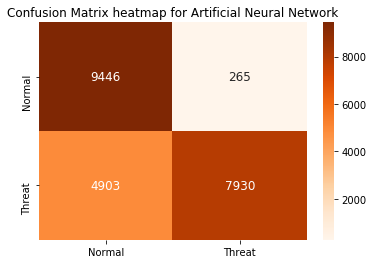

In [8]:
#Feature normalization and trasformation in training and testind data
robust_scaler = RobustScaler().fit(train_x)
trainX = robust_scaler.transform(train_x)
testX = robust_scaler.transform(test_x)
#Import classifier function from sklearn library
from sklearn.neural_network import MLPClassifier
#Set classifier parameters according to the input data
classifier = MLPClassifier(activation='logistic', batch_size=200, hidden_layer_sizes=(100, 50, 50, 30),
                          learning_rate = 'adaptive', solver = 'adam', learning_rate_init = 0.01, max_iter=250,
                          early_stopping=True, validation_fraction=0.1)
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, pred_y)
error = zero_one_loss(testY, pred_y)
NN_time = time.time() - t #Total time
NN_acc = round(accuracy_score(testY, pred_y) * 100, 2)
NN_prec = round(precision_score(testY, pred_y, average = 'macro') * 100, 2)
NN_rec = round(recall_score(testY, pred_y, average = 'macro') * 100, 2)
NN_kappa = round(cohen_kappa_score(testY, pred_y) * 100, 2)
NN_f1_sc = round(f1_score(testY, pred_y, average = 'macro') * 100, 2)
NN_err = round(zero_one_loss(testY, pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Neural Network\033[0m")
print(classification_report(testY, pred_y, target_names=labels))
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Oranges',annot=True, annot_kws={"size": 12}, fmt="d")
plt.title('Confusion Matrix heatmap for Artificial Neural Network')
plt.show()

#### 2. K-Nearest Neighbor Classifier

Comparison Table for k-Nearest Neighbors
              precision    recall  f1-score   support

      Normal       0.64      0.94      0.76      9711
      Threat       0.93      0.60      0.73     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.74     22544



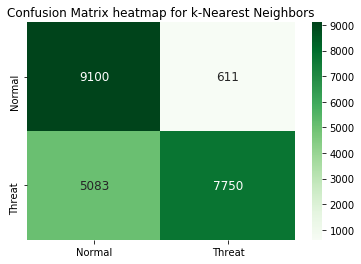

In [9]:
#Feature normalization and trasformation in training and testind data
standard_scaler = StandardScaler().fit(train_x)
trainX = standard_scaler.transform(train_x)
testX = standard_scaler.transform(test_x)
#Import classifier function from sklearn library
from sklearn.neighbors import KNeighborsClassifier
#Set classifier parameters according to the input data
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                  leaf_size=30)
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, pred_y)
error = zero_one_loss(testY, pred_y)
knn_time = time.time() - t #Total time
knn_acc = round(accuracy_score(testY, pred_y) * 100, 2)
knn_prec = round(precision_score(testY, pred_y, average = 'macro') * 100, 2)
knn_rec = round(recall_score(testY, pred_y, average = 'macro') * 100, 2)
knn_kappa = round(cohen_kappa_score(testY, pred_y) * 100, 2)
knn_f1_sc = round(f1_score(testY, pred_y, average = 'macro') * 100, 2)
knn_err = round(zero_one_loss(testY, pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for k-Nearest Neighbors\033[0m")
print(classification_report(testY, pred_y, target_names=labels))
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Greens',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for k-Nearest Neighbors')
plt.show()

#### 3. Decision Tree Classifier

Comparison Table for Decision Tree Classifier
              precision    recall  f1-score   support

      Normal       0.67      0.97      0.79      9711
      Threat       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



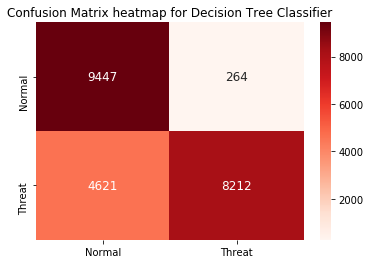

In [10]:
#Feature normalization and trasformation in training and testind data
standard_scaler = StandardScaler().fit(train_x)
trainX = standard_scaler.transform(train_x)
testX = standard_scaler.transform(test_x)
#Import classifier function from sklearn library
from sklearn.tree import DecisionTreeClassifier
#Set classifier parameters according to the input data
classifier = DecisionTreeClassifier(random_state=17)
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, pred_y)
error = zero_one_loss(testY, pred_y)
DTC_time = time.time() - t #Total time
DTC_acc = round(accuracy_score(testY, pred_y) * 100, 2)
DTC_prec = round(precision_score(testY, pred_y, average = 'macro') * 100, 2)
DTC_rec = round(recall_score(testY, pred_y, average = 'macro') * 100, 2)
DTC_kappa = round(cohen_kappa_score(testY, pred_y) * 100, 2)
DTC_f1_sc = round(f1_score(testY, pred_y, average = 'macro') * 100, 2)
DTC_err = round(zero_one_loss(testY, pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Decision Tree Classifier\033[0m")
print(classification_report(testY, pred_y, target_names=labels))
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Reds',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for Decision Tree Classifier')
plt.show()

### b) Overall Comparisons

#### Table comparison between all algorithms performance measures

In [11]:
#Saving all algorithms in single dataframe
overall = pd.DataFrame({'Algorithm': ['ANN', 'kNN', 'DecTree'],
                    'Accuracy(%)': [NN_acc, knn_acc, DTC_acc],
                   'Precision(%)': [NN_prec, knn_prec, DTC_prec],
                   'Recall(%)': [NN_rec, knn_rec, DTC_rec],
                    'F1-Score(%)': [NN_f1_sc, knn_f1_sc, DTC_f1_sc],
                   'Error(%)': [NN_err, knn_err, DTC_err],
                     'Time(s)': [NN_time, knn_time, DTC_time]})
display(overall)

,Algorithm,Accuracy(%),Precision(%),Recall(%),F1-Score(%),Error(%),Time(s)
0,ANN,77.08,81.30,79.53,76.97,22.92,51.138230
1,kNN,74.74,78.43,77.05,74.65,25.26,250.413133
2,DecTree,78.33,82.02,80.64,78.27,21.67,1.748322


#### Bar plot comparison between accuracy of different algorithms

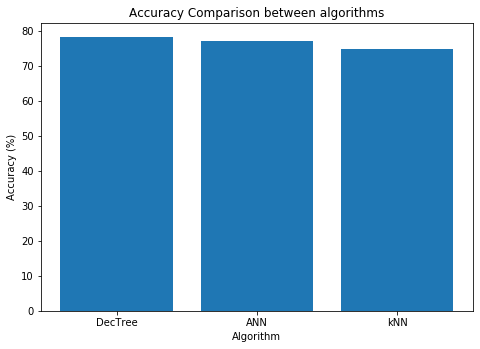

In [12]:
all_acc = [DTC_acc, NN_acc, knn_acc]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algos = ['DecTree', 'ANN', 'kNN']
ax.bar(algos, all_acc)
plt.title('Accuracy Comparison between algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.show()

# The END